# Lista 2

### Wprowadzenie

Chcemy wygenerować zmienną losową X z rozkładu o ciągłej dystrybuancie F.
Załóżmy, że umiemy generować zmienne losowe $U$ z rozkładu $U(0, 1)$. 

Algorytm:
1. Generuj $U$.
2. Wstaw $X = F^{-1}(U)$, gdzie $F^{-1}$ jest uogólnioną funkcją odwrotną. 

W przypadku rozkładu dyskretnego, $P(X =x_i) = p_i, \\ i=1,2,..., \sum_i p_i = 1$, postępujemy w następujący sposób:
1. Generuj $U$
2. Wyznacz $j \in \mathbb{N}$ takie, że $\sum_{i=1}^{j-n} p_i < U \leq \sum_{i=1}^j p_i$
3. Zwróć $X =x_i$.

Wszędzie tam, gdzie potrafimy wyliczyć jawne wzory na dystrybuantę odwrotną,
korzystamy z nich. W pozostałych przypadkach korzystamy z napisanej wcześniej
jako argumenty parametry rozkładu, zwraca jednoargumentową funkcję.
funkcji `finv` . Uwaga: być może trzeba będzie napisać funkcję, która, przyjmując parametry rozkładu, zwraca jednoargimentową funkcję.

In [2]:
def war_pr(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

In [1]:
def srednia(X):
    n = len(X)
    return sum(X)/n

## zadanie dodatkowe

Dla ustalonego $N$, przetestuj 3 wybrane generatory z powyższych zadań, wykonując
następujące podpunkty:
1. Histogram i gęstość teoretyczna (na jednym wykresie).
2. Dystrybuanta empiryczna i dystrybuanta teoretyczna (na jednym wykresie).
3. Wykres kwantylowy (QQ-plot).
4. Policz średnią i wariancję próbkową; porównaj je z wartościami teoretycznymi.
$$\text{------ dotąd mam zrobione ------}$$
5. Wykonaj wybrane testy zgodności.
6. Porównaj czas działania zaprogramowanych generatorów podczas generowania $10^6$ zmiennych losowych z generatorami wbudowanymi w Pythonie.

### zadanie 1
**Rozkłady ciągłe** \
Zaimplementuj generowanie metodą odwrotnej dystrybuanty
rozkładu wykładniczego Exp(λ), normalnego $\text{N}(µ, σ^2)$ oraz Cauchy’ego $\text{C}(µ, γ)$.


* rozkład wykładniczy

In [3]:
import numpy as np, matplotlib.pyplot as plt, math, random, seaborn as sns
from scipy.stats import norm, probplot, cauchy, geom, expon, poisson

In [4]:
def F_1exp(X, lambd = 3):
    return [-1/lambd*np.log(1-x) for x in X]

In [5]:
def F_exp(X, lambd = 3):
    return [1 - np.exp(-lambd*x) for x in X]

In [6]:
def f_exp(X, lambd = 3):
    return [lambd*np.exp(-lambd*x) for x in X]

In [7]:
n = 1000
lambd = 3
X0 = np.random.rand(n)
X = F_1exp(X0)

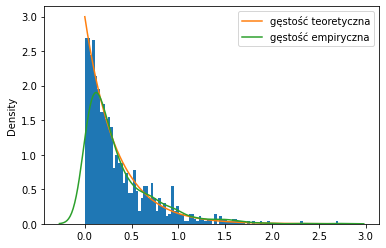

In [8]:
xs  = np.linspace(0,n,1000)
plt.hist(X,density=True, bins=100)
plt.plot(sorted(X), f_exp(sorted(X)), label = 'gęstość teoretyczna')
sns.kdeplot(X, label = 'gęstość empiryczna')
plt.legend()
plt.show()

In [9]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n


In [10]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = sorted(F_exp(X))
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

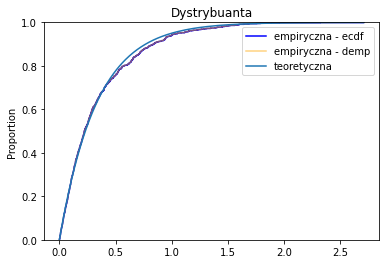

In [11]:
drewdemp(X)

((array([6.93147181e-04, 1.68330207e-03, 2.68512296e-03, 3.68794851e-03,
         4.69178072e-03, 5.69662163e-03, 6.70247325e-03, 7.70933763e-03,
         8.71721682e-03, 9.72611284e-03, 1.07360278e-02, 1.17469636e-02,
         1.27589226e-02, 1.37719066e-02, 1.47859178e-02, 1.58009582e-02,
         1.68170300e-02, 1.78341353e-02, 1.88522761e-02, 1.98714545e-02,
         2.08916728e-02, 2.19129330e-02, 2.29352372e-02, 2.39585876e-02,
         2.49829863e-02, 2.60084354e-02, 2.70349372e-02, 2.80624938e-02,
         2.90911074e-02, 3.01207801e-02, 3.11515141e-02, 3.21833116e-02,
         3.32161748e-02, 3.42501059e-02, 3.52851071e-02, 3.63211807e-02,
         3.73583289e-02, 3.83965538e-02, 3.94358578e-02, 4.04762430e-02,
         4.15177118e-02, 4.25602664e-02, 4.36039090e-02, 4.46486419e-02,
         4.56944675e-02, 4.67413879e-02, 4.77894056e-02, 4.88385227e-02,
         4.98887416e-02, 5.09400647e-02, 5.19924942e-02, 5.30460325e-02,
         5.41006818e-02, 5.51564447e-02, 5.62133233

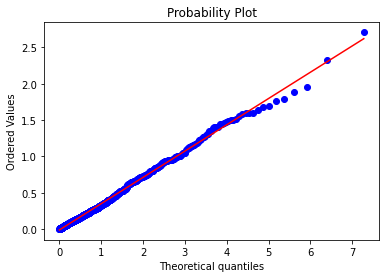

In [12]:
probplot(X, dist = 'expon', plot=plt)

In [13]:

print('średnia teoretyczna: ', 1/lambd, '\nśrednia próbkowa: ', srednia(X), '\nwariancja teoretyczna: ',1/lambd**2, '\nwariancja próbkowa ',war_pr(X))

średnia teoretyczna:  0.3333333333333333 
średnia próbkowa:  0.3482359392050018 
wariancja teoretyczna:  0.1111111111111111 
wariancja próbkowa  0.1294774811580686


* rozkład normalny

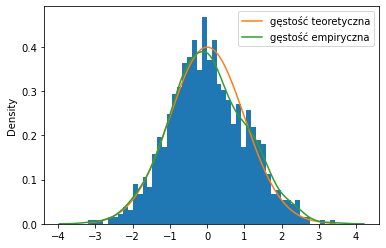

In [14]:
mi = 0
sigma = 1
X1 = norm.ppf(X0, loc = mi, scale = sigma**0.5)
plt.hist(X1, density = True, bins = 50)
plt.plot(sorted(X1), norm.pdf(sorted(X1), loc = mi, scale = sigma), label = 'gęstość teoretyczna')
sns.kdeplot(X1, label = 'gęstość empiryczna')
plt.legend()
plt.show()


In [15]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = norm.cdf(x_values, loc = mi, scale = sigma)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

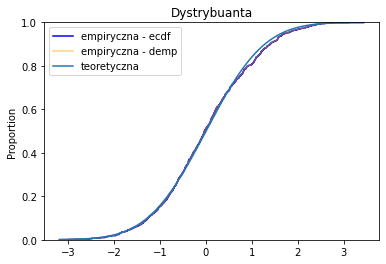

In [16]:
drewdemp(X1)

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

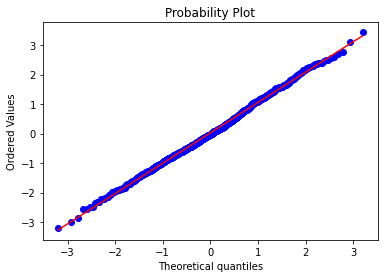

In [17]:
probplot(X1, dist = 'norm', plot=plt)

In [18]:
print('średnia teoretyczna: ', mi, '\nśrednia próbkowa: ', srednia(X1), '\nwariancja teoretyczna: ',sigma, '\nwariancja próbkowa ',war_pr(X1))

średnia teoretyczna:  0 
średnia próbkowa:  0.026300157922530466 
wariancja teoretyczna:  1 
wariancja próbkowa  1.055150904243896


* rozkład Cauchy'ego

In [19]:
def F_c(X, x0, gamma):
    return [1/np.pi * np.arctan((u - x0)/gamma) + 1/2 for u in X]

In [20]:
def F_1c(X, x0, gamma):
    return [x0 + gamma*np.tan(np.pi*(u - 0.5)) for u in X]

In [21]:
def f_c(X, x0, gamma):
    return [1/(np.pi * gamma * (1 + ((u +x0)/gamma)**2)) for u in X]

In [22]:
x0 = 0
gamma = 1
X2 = F_1c(X0, x0, gamma)

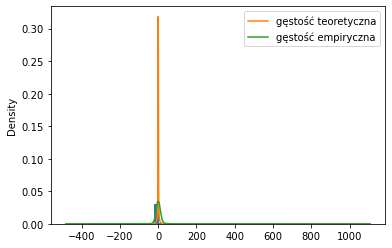

In [23]:
plt.hist(X2, density = True, bins = 50)
plt.plot(sorted(X2), f_c(sorted(X2),x0, gamma), label = 'gęstość teoretyczna')
sns.kdeplot(X2, label = 'gęstość empiryczna')
plt.legend()
plt.show()

In [24]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.sort(X)
    y_values = [demp(x_values, x) for x in x_values]
    z_values = sorted(F_c(X, x0, gamma))
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.xlim(-5,5)
    plt.title('Dystrybuanta')
    plt.show()

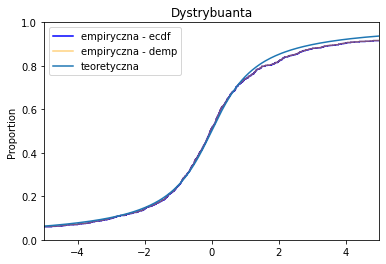

In [25]:
drewdemp(X2)

((array([-4.59382542e+02, -1.89255932e+02, -1.18702157e+02, -8.64662250e+01,
         -6.79985300e+01, -5.60303152e+01, -4.76437443e+01, -4.14401930e+01,
         -3.66653787e+01, -3.28766252e+01, -2.97970140e+01, -2.72444414e+01,
         -2.50942382e+01, -2.32581816e+01, -2.16720837e+01, -2.02881284e+01,
         -1.90699644e+01, -1.79894638e+01, -1.70245208e+01, -1.61575221e+01,
         -1.53742609e+01, -1.46631512e+01, -1.40146503e+01, -1.34208270e+01,
         -1.28750356e+01, -1.23716655e+01, -1.19059471e+01, -1.14738000e+01,
         -1.10717128e+01, -1.06966474e+01, -1.03459617e+01, -1.00173472e+01,
         -9.70877784e+00, -9.41846831e+00, -9.14483914e+00, -8.88648789e+00,
         -8.64216508e+00, -8.41075386e+00, -8.19125286e+00, -7.98276164e+00,
         -7.78446832e+00, -7.59563891e+00, -7.41560820e+00, -7.24377191e+00,
         -7.07957985e+00, -6.92252999e+00, -6.77216334e+00, -6.62805940e+00,
         -6.48983222e+00, -6.35712692e+00, -6.22961664e+00, -6.10699981e+00,

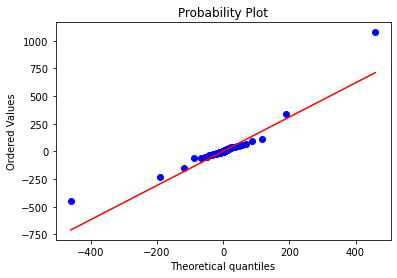

In [26]:
probplot(X2, dist = 'cauchy', plot=plt)

In [27]:
# średnia i wariancja teoretyczne są nieokreślone

print('średnia próbkowa: ', srednia(X2),'\nwariancja próbkowa ',war_pr(X2))

średnia próbkowa:  1.1751305197180368 
wariancja próbkowa  1633.6466074670197


### zadanie 2

**Rozkłady dyskretne** $\\$
Zaimplementuj generowanie metodą odwrotnej dystrybuanty rozkładu geometrycznego Geo($p$) oraz Poissona Poiss(λ).

* rozkład geometryczny

In [28]:
from scipy.stats import geom

In [29]:
def F_1geo(X,p):
    return np.ceil(np.log(X)/np.log(1-p))

In [30]:
def f_geo(X,p):
    return [(1-p)**(k-1)*p for k in X]

In [31]:
p = 0.5
X3 = F_1geo(X0,p)
xs = np.linspace(0,10,n)

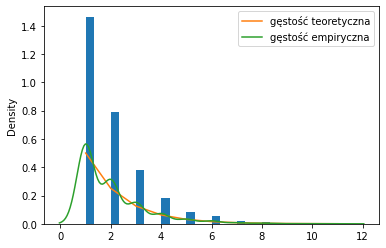

In [32]:
plt.hist(X3, density = True, bins = 30)
plt.plot(sorted(X3), f_geo(sorted(X3),p), label = 'gęstość teoretyczna')
sns.kdeplot(X3, label = 'gęstość empiryczna')
plt.legend()
plt.show()

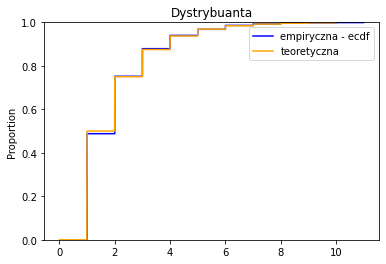

In [33]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = xs
    # y_values = [demp(x_values, x) for x in x_values]
    z_values = geom.cdf(x_values, p)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    # plt.plot(x_values, y_values, label='empiryczna - demp', color = 'red', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna', color = 'orange')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

drewdemp(X3)

((array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,

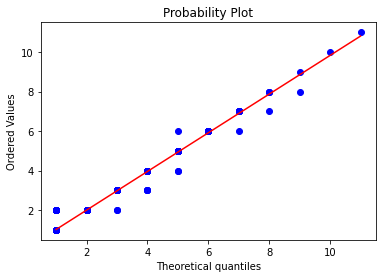

In [34]:
probplot(X3, dist = 'geom',sparams =(p,), plot=plt)

In [35]:
print('średnia teoretyczna: ', 1/p, '\nśrednia próbkowa: ', srednia(X3), '\nwariancja teoretyczna: ',(1-p)/p**2, '\nwariancja próbkowa ',war_pr(X3))

średnia teoretyczna:  2.0 
średnia próbkowa:  2.0 
wariancja teoretyczna:  2.0 
wariancja próbkowa  1.9139139139139139


* rozkład Poissona

In [36]:
from scipy.stats import poisson

In [37]:
def F_1poisson(lam):
    U = random.random()
    j=0
    p = np.exp(-lam)
    F = p
    while U>F:
        p = p*lam/(j+1)
        F += p
        j += 1 
    return j

In [38]:
lam = 3
print(F_1poisson(4))

6


In [39]:
X4 = [F_1poisson(lam) for _ in range(n)]

In [40]:
def f_geo(X,p):
    return [(1-p)**(k-1)*p for k in X]

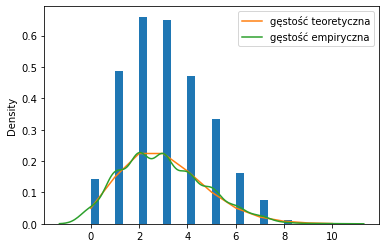

In [41]:
plt.hist(X4, density = True, bins = 30)
plt.plot(sorted(X4), [poisson.pmf(x, lam) for x in sorted(X4)], label = 'gęstość teoretyczna')
sns.kdeplot(X4, label = 'gęstość empiryczna')
plt.legend()
plt.show()

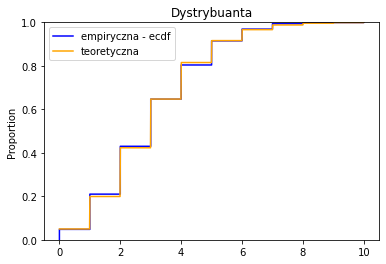

In [42]:
def drewdemp(X): # dodana opcja porównania do tego zadania
    x_values = xs
    # y_values = [demp(x_values, x) for x in x_values]
    z_values = poisson.cdf(x_values, lam)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    # plt.plot(x_values, y_values, label='empiryczna - demp', color = 'red', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna', color = 'orange')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()

drewdemp(X4)

((array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,

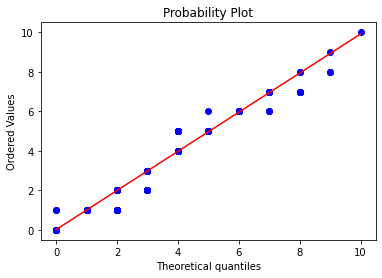

In [43]:
probplot(X4, dist = 'poisson',sparams =(lam,), plot=plt)

In [44]:
print('średnia teoretyczna: ', lam, '\nśrednia próbkowa: ', srednia(X4), '\nwariancja teoretyczna: ',lam, '\nwariancja próbkowa ',war_pr(X4))

średnia teoretyczna:  3 
średnia próbkowa:  2.986 
wariancja teoretyczna:  3 
wariancja próbkowa  2.9747787787787776


# ♥☺☻♦♣♠•◘○

In [56]:
def exp_(x, lambd = 3):
    return 1 - np.exp(-lambd*x)

In [70]:
def newton(F):
    deltax = 0.1
    x = 0
    for _ in range(100):
        x = x - F(x)/ (F(x+deltax) - F(x)) *deltax 
    
    return x


In [72]:
def F_1(F, u):
    return newton(lambda y: F(y)-u)

In [74]:
print(F_1(exp_, 10))

inf


C:\Users\lab\AppData\Local\Temp/ipykernel_16712/691120108.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - F(x)/ (F(x+deltax)- F(x))*deltax


In [ ]:
s = np.linspace(0,10,10)

# lista 3

## zad 1

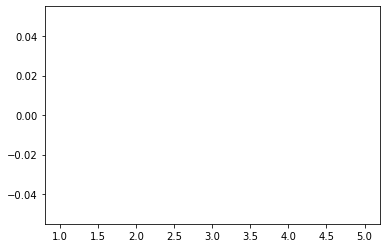

In [78]:
pr = [0.11, 0.12, 0.27, 0.19, 0.31]
plt.hist(pr, bins=[1,2,3,4,5])
plt.show()